<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw4_1_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graphs
Graph models are a very powerful tool in data science and have several applications in the fields of computer science and data science. For example, they are used in graph databases and in MaskCut, an unsupervised segmentation method for generating pseudo-masks. They play a role in network analysis, specifically in social graphs. A graph consists of nodes, which represent objects for example individuals in a social network, and edges, which are the relationships between these nodes. This makes them used for defining interactions and relationships between different entities. Clusters within a graph represent data grouped together and provide information such as spatio-temporal insights.
## Graph Models

Graph models consist of a set of **nodes** and **edges**, represented as $ G(V, E) $, where:
- $ V = \{v_1, v_2, \dots, v_n\} $ is the set of **nodes**,
- $ E = \{e_1, e_2, \dots, e_m\} $ is the set of **edges** connecting pairs of nodes.

### Types of Graphs
1. **Directed Graphs**: Edges $ e(v_1, v_2) \neq e(v_2, v_1) $, direction matters.
2. **Undirected Graphs**: Edges $ e(v_1, v_2) = e(v_2, v_1) $, direction does not matter.
3. **Mixed Graphs**: Contains both directed and undirected edges.

### Paths
- A **path** is a sequence of distinct nodes connected by edges: $ (v_1, v_2, v_3, \dots, v_k) $.
- The **shortest path** is the path with the least number of edges.

### Neighborhood
- The **n-hop neighborhood** of a node $ v_i $ includes all nodes reachable within $ n $ hops.

### Degree of a Node
- The **degree** is the number of edges connected to a node:
  - **In-degree**: Number of incoming edges (for directed graphs).
  - **Out-degree**: Number of outgoing edges (for directed graphs).
  - **Degree centrality** measures a node's importance based on connections:
  - **In-degree centrality**: Indicates popularity or prestige.
  - **Out-degree centrality**: Indicates outgoing interactions (gregariousness).


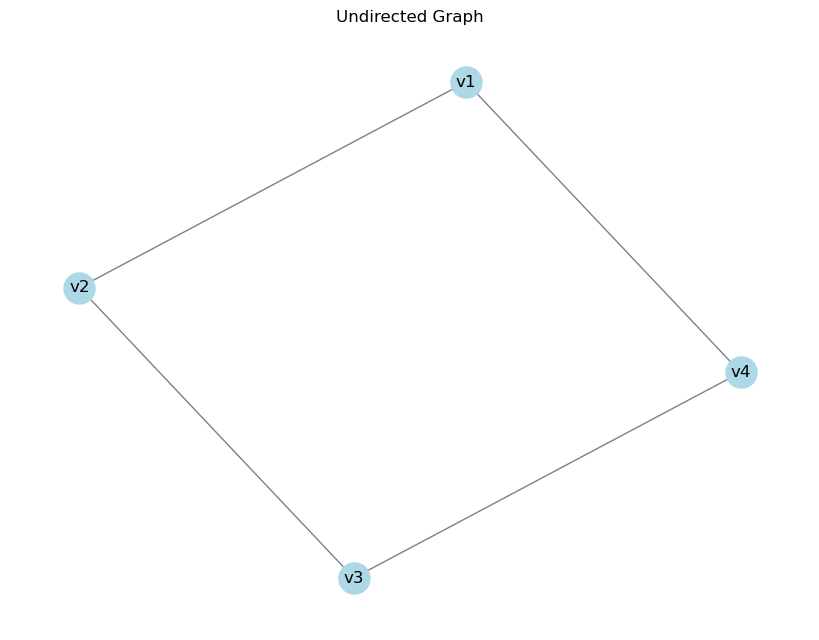

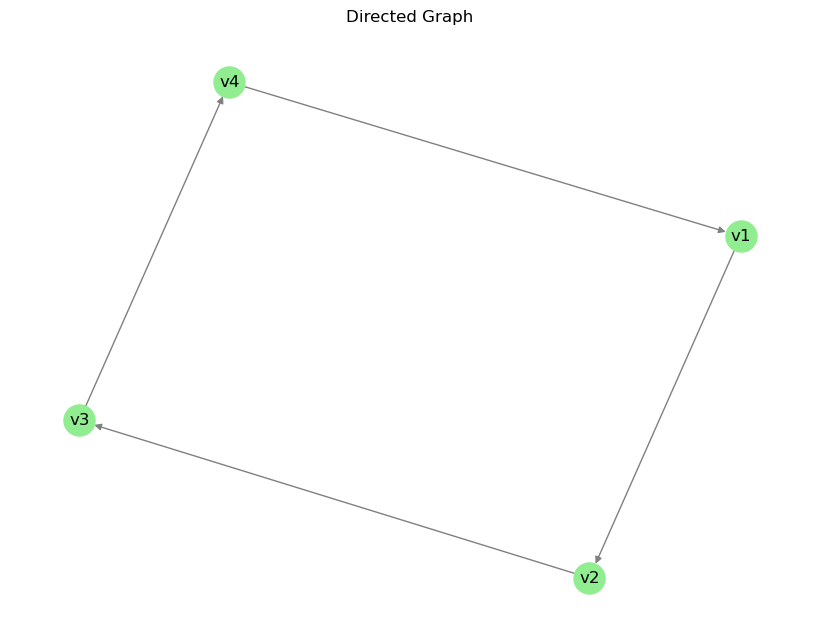

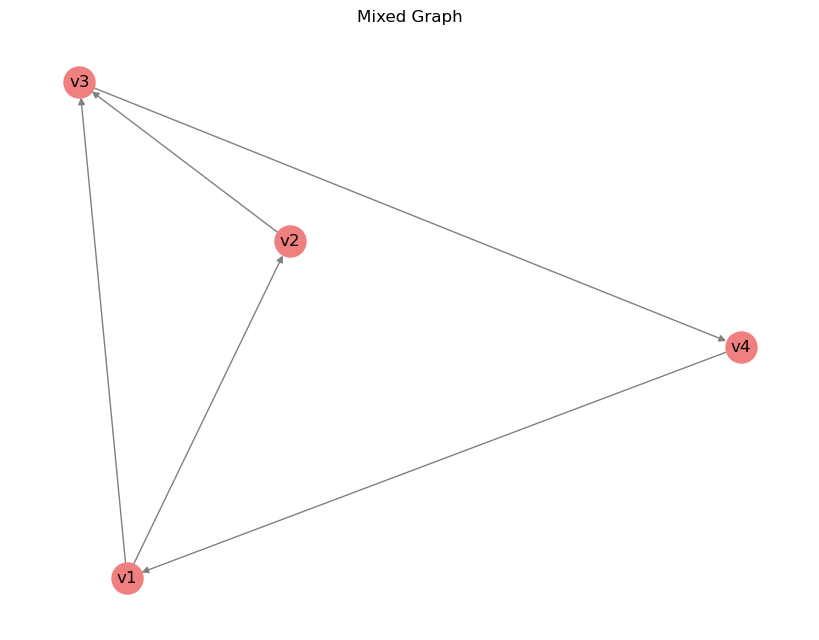

Shortest path from v1 to v3: ['v1', 'v2', 'v3']


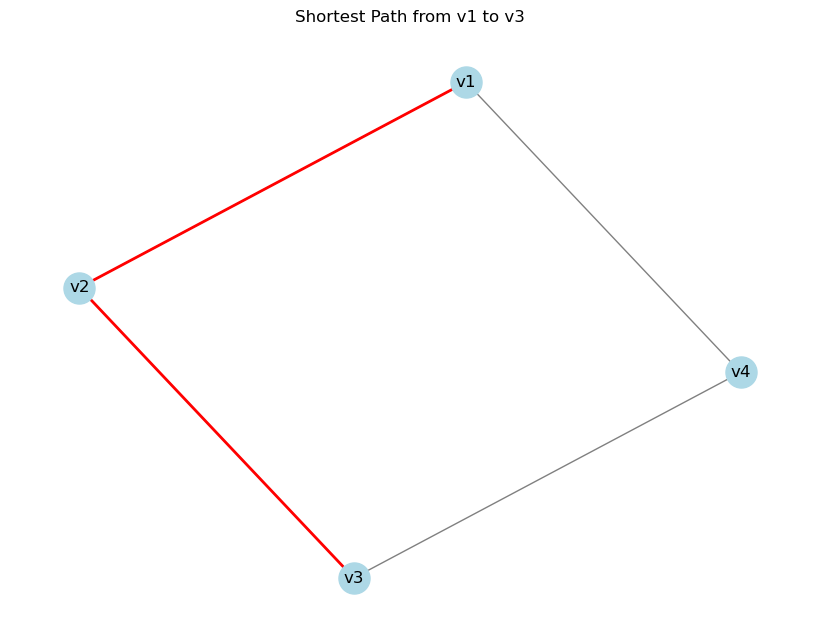

1-hop neighbors of v1: ['v2', 'v4']


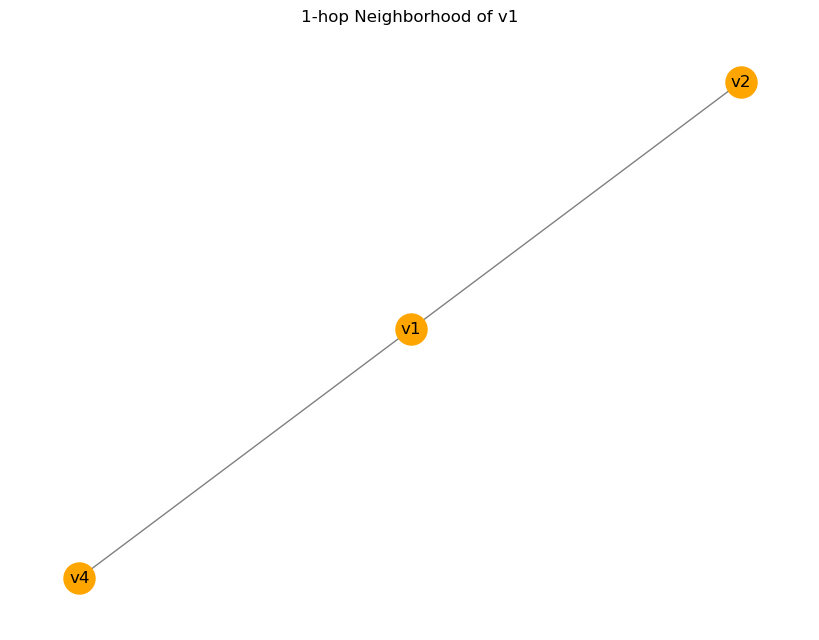

Degree of v1: 2
In-degree of v2: 1
Out-degree of v2: 1


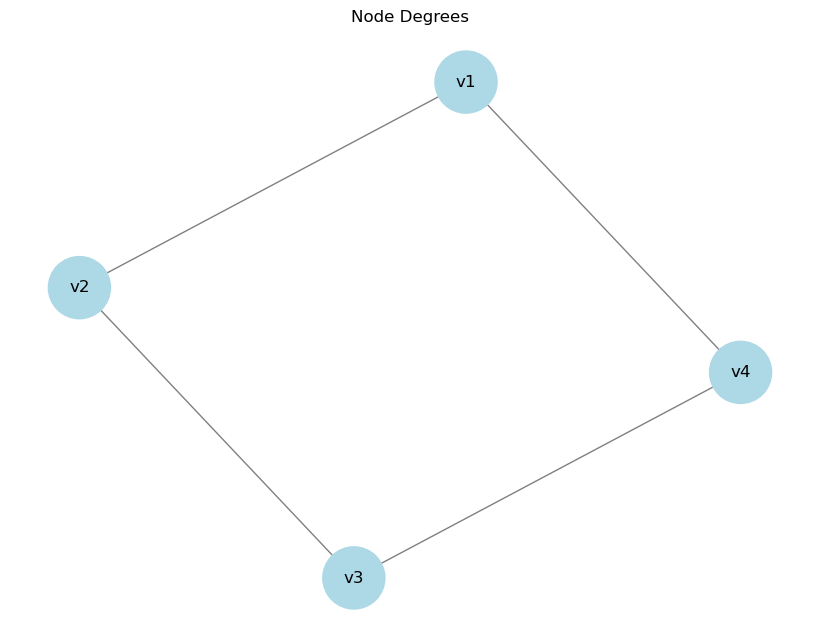

Degree Centrality:
v1: 0.67
v2: 0.67
v3: 0.67
v4: 0.67


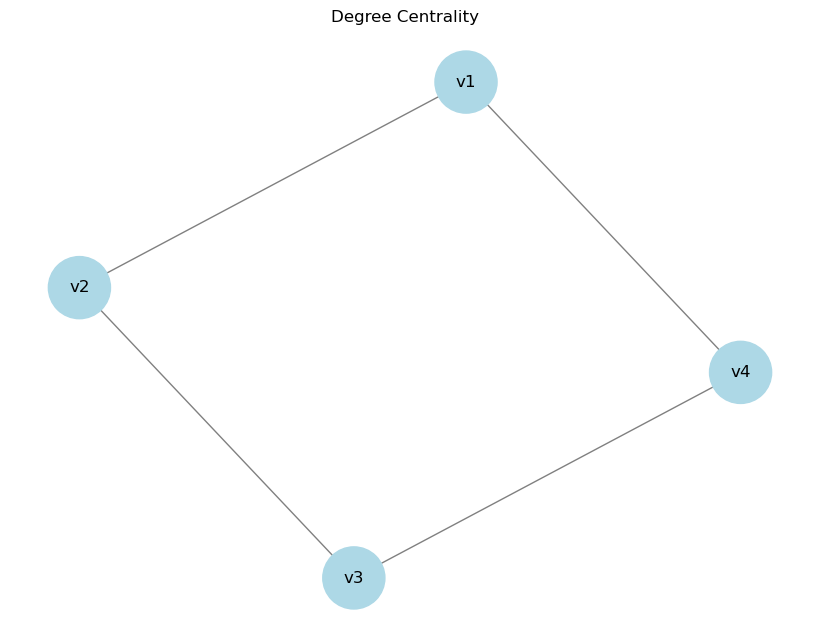

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt



# Graph Models

G = nx.Graph()
nodes = ['v1', 'v2', 'v3', 'v4']
edges = [('v1', 'v2'), ('v2', 'v3'), ('v3', 'v4'), ('v4', 'v1')]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define positions
pos = nx.spring_layout(G)


plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("Undirected Graph")
plt.show()

# Types of Graphs

# Directed Graph
DG = nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_edges_from(edges)

# Define positions for the directed graph
pos_DG = nx.spring_layout(DG)

plt.figure(figsize=(8, 6))
nx.draw(DG, pos_DG, with_labels=True, node_color='lightgreen', edge_color='gray', arrows=True, node_size=500)
plt.title("Directed Graph")
plt.show()

### Mixed Graph
MG = nx.MultiDiGraph()
MG.add_nodes_from(nodes)
MG.add_edges_from(edges)
MG.add_edge('v1', 'v3')

# Define positions for the mixed graph
pos_MG = nx.spring_layout(MG)

plt.figure(figsize=(8, 6))
nx.draw(MG, pos_MG, with_labels=True, node_color='lightcoral', edge_color='gray', arrows=True, node_size=500)
plt.title("Mixed Graph")
plt.show()

# Paths

# Define a path from v1 to v3
path = nx.shortest_path(G, source='v1', target='v3')
print(f"Shortest path from v1 to v3: {path}")


path_edges = list(zip(path, path[1:]))

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title("Shortest Path from v1 to v3")
plt.show()

# Neighborhood

# 1-hop neighborhood of v1
neighbors = list(G.neighbors('v1'))
print(f"1-hop neighbors of v1: {neighbors}")

# Visualize the neighborhood
sub_nodes = ['v1'] + neighbors
subgraph = G.subgraph(sub_nodes)
pos_sub = nx.spring_layout(subgraph)

plt.figure(figsize=(8, 6))
nx.draw(subgraph, pos_sub, with_labels=True, node_color='orange', edge_color='gray', node_size=500)
plt.title("1-hop Neighborhood of v1")
plt.show()

# Degree of a Node

# Calculate degrees
degree = G.degree('v1')
print(f"Degree of v1: {degree}")

# For Directed Graph
in_degree = DG.in_degree('v2')
out_degree = DG.out_degree('v2')
print(f"In-degree of v2: {in_degree}")
print(f"Out-degree of v2: {out_degree}")

# Visualize node degrees
degrees = dict(G.degree())
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', node_size=[v * 1000 for v in degrees.values()])
plt.title("Node Degrees")
plt.show()

# Degree Centrality

degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality:.2f}")

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', node_size=[v * 3000 for v in degree_centrality.values()])
plt.title("Degree Centrality  ")
plt.show()


### Laplacian Matrix

- The Laplacian matrix  $L  $ of a graph  $G  $ is defined as:
  $$
  L_{ij} =
  \begin{cases}
  \sum_k E_{ik}, & \text{if } i = j \, \text{(degree of node)} \\
  -E_{ij}, &  i \neq j \text{ and if } v_i \text{ is adjacent to } v_j \\
  0, & \text{otherwise.}
  \end{cases}
   $$
-  $L = D - M $, where:
  -  $D $: Diagonal degree matrix ( $D_{ii} = \text{degree of node } i  $).
  -  $M  $: Adjacency matrix.

### Properties
1. **Matrix Decomposition**:
   -  $ L = I_G I_G^T  $, where  $ I_G  $ is the **incidence matrix**.
   
2. **Symmetry**:
   -  $ L  $ is symmetric and positive semi-definite.

3. **Eigenvalues**:
   - All eigenvalues of  $ L  $ are real and non-negative.
   -  $ L e = 0  $, where  $ e = [1, 1, \dots, 1]^T  $.  $ 0  $ is the smallest eigenvalue.
   - The number of  $ 0  $-eigenvalues equals the number of connected components in the graph.

4. - For any vector  $ x  $:
      $$
     x^T L x = \sum_{(i, j) \in E} E_{ij} (x_i - x_j)^2.
      $$
5. **Scaling Property**:
   - For any vector  $ x  $ and scalars  $ \alpha, \beta  $:
      $$
     (\alpha x + \beta e)^T L (\alpha x + \beta e) = \alpha^2 x^T L x.
      $$
6. **Spectral Partitioning**:
   - The second smallest eigenvalue  $ \lambda_2  $ (**Fiedler value**) and its eigenvector (**Fiedler vector**) are used to partition the graph.

8. **Optimization Problem**:
   - The problem:
      $$
     \min_{x \neq 0} x^T L x, \quad \text{subject to } x^T x = 1, \, x^T e = 0,
      $$
     is solved when  $ x  $ is the eigenvector corresponding to the second smallest eigenvalue  $ \lambda_2  $ (the Fiedler vector).

## Courant-Fischer Theorem
$$
\min_{x \neq 0, x^T v_1 = 0} \frac{x^T A x}{x^T x} = \lambda_2
$$



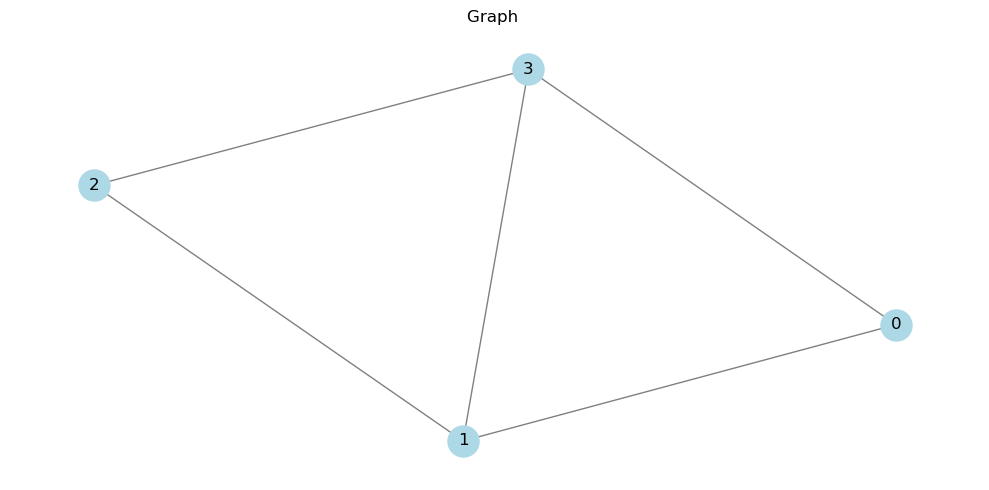

Adjacency Matrix (A):
[[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]

Degree Matrix (D):
[[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 3]]

Laplacian Matrix (L):
[[ 2 -1  0 -1]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]

Eigenvalues of L:
[-7.54604712e-16  2.00000000e+00  4.00000000e+00  4.00000000e+00]

Fiedler Vector (Eigenvector of λ2):
[ 7.07106781e-01 -1.31127535e-16 -7.07106781e-01  2.58817104e-17]

Optimization Property Value: 2.0000 (Should match λ2: 2.0000)


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)]  # Example graph with 4 nodes
G = nx.Graph()
G.add_edges_from(edges)

# Compute adjacency matrix
A = nx.adjacency_matrix(G).toarray()

# Degree matrix
D = np.diag([val for (_, val) in G.degree()])

# Laplacian matrix
L = D - A

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(L)
fiedler_value = eigenvalues[1]
fiedler_vector = eigenvectors[:, 1]

plt.figure(figsize=(10, 5))

# Plot the graph
plt.subplot(1, 1, 1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("Graph ")


plt.tight_layout()
plt.show()

# Display  properties
print("Adjacency Matrix (A):")
print(A)
print("\nDegree Matrix (D):")
print(D)
print("\nLaplacian Matrix (L):")
print(L)
print("\nEigenvalues of L:")
print(eigenvalues)
print("\nFiedler Vector (Eigenvector of λ2):")
print(fiedler_vector)

# Verify optimization property
x = fiedler_vector
value = np.dot(x.T, np.dot(L, x)) / np.dot(x.T, x)
print(f"\nOptimization Property Value: {value:.4f} (Should match λ2: {fiedler_value:.4f})")


### Spectral Graph Bipartitioning

- **Graph Cut**:
  - **Objective**: Partition  $ V $ into  $ V_1 $ and  $ V_2 $ to minimize:

    $$
    \text{cut}(V_1, V_2) = \sum_{i \in V_1, j \in V_2} M_{ij},
    $$

    where  $ M $ is the adjacency matrix.
  - Can generalize to  $ k $-way partitions:
$$
\text{cut}(V_1, V_2, \dots, V_k) = \sum_{i < j} \text{cut}(V_i, V_j).
$$


- **Partition Vector**:
  - Represent the partition using a vector  $ p $:
    $$
    p_i =
    \begin{cases}
    +1, & \text{if } i \in V_1, \\
    -1, & \text{if } i \in V_2.
    \end{cases}
    $$
  - The cut can be characterized by the Rayleigh quotient:
    $$
    \frac{p^T L p}{p^T p} = \frac{1}{n} \cdot 4 \cdot \text{cut}(V_1, V_2),
    $$
    where  $ L $ is the Laplacian matrix of the graph.

- **Weighted Cut**:
  - Defines a weight matrix  $ W $ to balance the vertex subsets  $ V_1 $ and  $ V_2 $:
  $$
  Q(V_1, V_2) = \frac{\text{cut}(V_1, V_2)}{W_{V_1}} + \frac{\text{cut}(V_1, V_2)}{W_{V_2}}
  $$
    -  $ W_{V_i} = \text{sum of weights of nodes in } V_i $.

- **Generalized Eigenvalue Problem**:
  - Use the serialized partition vector  $ q $ :
  $$
  q_i =
  \begin{cases}
  + \sqrt{\frac{v_2}{v_1}}, & \text{if } i \in V_1, \\
  - \sqrt{\frac{v_1}{v_2}}, & \text{if } i \in V_2.
  \end{cases}
  $$
  - Satisfies:
    1.  $ q^T W e = 0, \quad q^T W q = v_1 + v_2 $

    2.  $ \frac{q^T L q}{q^T W q} = \frac{\text{cut}(V_1, V_2)}{v_1} + \frac{\text{cut}(V_1, V_2)}{v_2} $
  - Solve:
     $$
    \min_{q \neq 0} \frac{q^T L q}{q^T W q}, \quad \text{subject to } q^T W e = 0.
    $$
    -  $ q $ is the eigenvector corresponding to the second smallest eigenvalue  $ \lambda_2 $ of  $ L x = \lambda W x $.

Here is the fixed version of the **Normalized and Ratio Cuts** section, with adjustments to include the general  $k $-partition case from the image:

### Normalized and Ratio Cuts

- **Ratio Cut**:
   $$
  \text{Ratio-Cut}(\pi) = \sum_{i=1}^k \frac{\text{cut}(C_i, \bar{C}_i)}{|C_i|},
   $$
  where  $ \pi = \{C_1, C_2, \dots, C_k\}  $ is a graph partition,  $ C_i \cap C_j = \emptyset  $, and  $ \bigcup_{i=1}^k C_i = V  $.

- **Normalized Cut**:
   $$
  \text{Normalized-Cut}(\pi) = \sum_{i=1}^k \frac{\text{cut}(C_i, \bar{C}_i)}{\text{vol}(C_i)},
   $$
  where:
   $$
  \text{vol}(C_i) = \sum_{j \in C_i} d_j,
   $$
  and  $ d_j  $ is the degree of node  $ j  $.
  - Smaller normalized cut values lead to more balanced partitions.


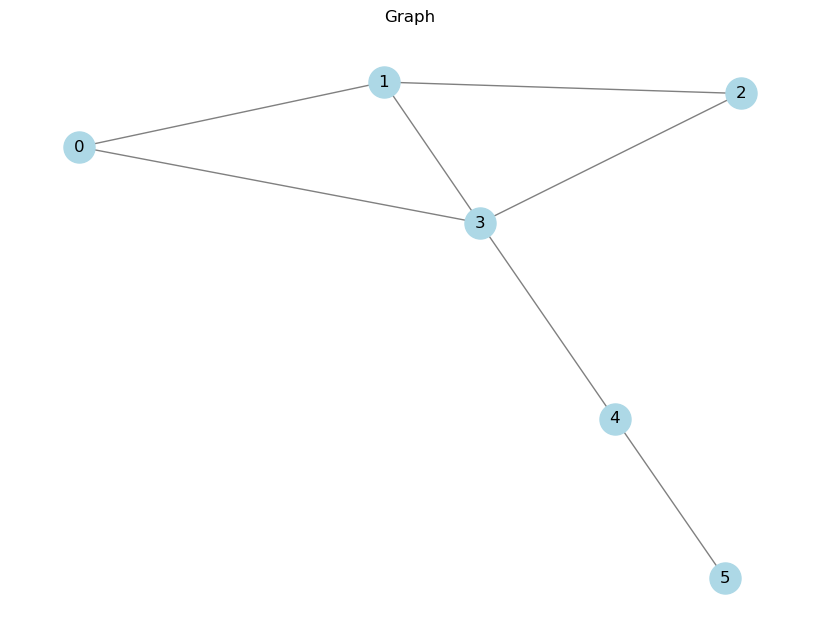

ValueError: matrix type must be 'f', 'd', 'F', or 'D'

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# Create a graph
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3), (3, 4), (4, 5)]
G = nx.Graph()
G.add_edges_from(edges)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("Graph")
plt.show()

# Adjacency matrix
A = nx.adjacency_matrix(G).toarray()

# Degree matrix
D = np.diag([val for (_, val) in G.degree()])

# Laplacian matrix
L = D - A
L = (D - A).astype(float)  # Ensure the matrix is float

# Compute the eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = eigsh(L, k=2, which='SM')  # Smallest eigenvalues
fiedler_vector = eigenvectors[:, 1]  # Second smallest eigenvector (Fiedler vector)

# Partition the graph based on the sign of the Fiedler vector
partition = {node: "V1" if fiedler_vector[i] > 0 else "V2" for i, node in enumerate(G.nodes)}

# Display partition results
print("Partition of nodes:")
for node, group in partition.items():
    print(f"Node {node}: {group}")

# Calculate cut, Ratio Cut, and Normalized Cut
def calculate_cuts(G, partition):
    V1 = [node for node, group in partition.items() if group == "V1"]
    V2 = [node for node, group in partition.items() if group == "V2"]

    cut_value = sum(1 for (u, v) in G.edges if partition[u] != partition[v])
    vol_V1 = sum(G.degree(node) for node in V1)
    vol_V2 = sum(G.degree(node) for node in V2)

    ratio_cut = cut_value / len(V1) + cut_value / len(V2)
    normalized_cut = cut_value / vol_V1 + cut_value / vol_V2

    return cut_value, ratio_cut, normalized_cut, V1, V2

cut_value, ratio_cut, normalized_cut, V1, V2 = calculate_cuts(G, partition)

# Display results
print(f"\nCut Value: {cut_value}")
print(f"Ratio Cut: {ratio_cut:.4f}")
print(f"Normalized Cut: {normalized_cut:.4f}")

# Verify Rayleigh Quotient
partition_vector = np.array([1 if partition[node] == "V1" else -1 for node in G.nodes])
rayleigh_quotient = (partition_vector.T @ L @ partition_vector) / (partition_vector.T @ partition_vector)
print(f"Rayleigh Quotient: {rayleigh_quotient:.4f} (Should match 4 * cut/n)")

# Visualize the partition
colors = ["lightblue" if partition[node] == "V1" else "lightgreen" for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=500)
plt.title("Graph Partition")
plt.show()

# Partition Vector Calculation (Generalized Eigenvalue Problem)
v1 = sum(G.degree(node) for node in V1)
v2 = sum(G.degree(node) for node in V2)
q = np.array([np.sqrt(v2 / v1) if partition[node] == "V1" else -np.sqrt(v1 / v2) for node in G.nodes])
weighted_rayleigh_quotient = (q.T @ L @ q) / (q.T @ q)
print(f"Weighted Rayleigh Quotient: {weighted_rayleigh_quotient:.4f}")
